In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
import matplotlib.pyplot as plt

import os

In [18]:
data = pd.read_csv("DATA2.csv")

In [19]:
data

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,4222,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79,9
4222,4223,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79,9
4223,4224,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84,9
4224,4225,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80,9


In [20]:
X = data.drop(["Age","dataset","S.No"], axis=1) 
y = data.Age.values

In [23]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn import svm

regr = svm.SVR()
regr.fit(x_train, y_train)



SVR()

In [32]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_SVR_train = regr.predict(x_train)
y_pred_SVR_test = regr.predict(x_test)

accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_SVR_train)

accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_SVR_test)

RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

Training Accuracy for Multiple Linear Regression Model:  0.332973219293501
Testing Accuracy for Multiple Linear Regression Model:  0.3503585573923673
RMSE for Training Data:  16.340243597203067
RMSE for Testing Data:  16.323531833057654


/Users/kalederkson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


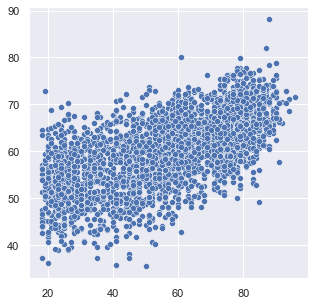

In [35]:
sns.scatterplot(y_train, y_pred_SVR_train)
sns.set(rc={'figure.figsize':(5,5)})

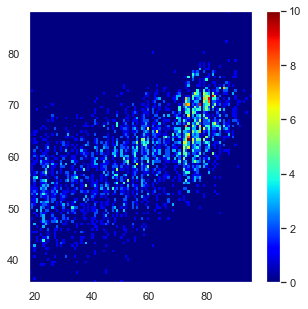

In [36]:
plt.hist2d(y_train, y_pred_SVR_train, (100, 100), cmap=plt.cm.jet)
plt.colorbar()
sns.set(rc={'figure.figsize':(5,7)})